In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
#selected_features = df.drop(['koi_disposition'], axis = 1)
X = df.drop(['koi_disposition'], axis = 1)
X.shape

(6991, 40)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
y = df['koi_disposition']
y_names = ['CONFIRMED','FALSE POSITIVE','CANDIDATE']
y.shape
#df.koi_disposition.value_counts()

(6991,)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5592, 40), (1399, 40), (5592,), (1399,))

In [6]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2921,0,0,0,0,170.995748,1.230000e-03,-1.230000e-03,163.957370,0.006430,-0.006430,...,-85,3.991,0.188,-0.101,1.983,0.337,-0.506,298.03305,39.883179,13.985
4085,0,0,1,1,0.566799,6.080000e-06,-6.080000e-06,131.843100,0.010400,-0.010400,...,-84,4.553,0.013,-0.117,0.870,0.120,-0.032,291.67123,42.812359,13.519
5502,1,0,0,0,12.314402,7.970000e-07,-7.970000e-07,134.252093,0.000051,-0.000051,...,-217,4.433,0.065,-0.195,1.066,0.313,-0.112,287.72620,49.435261,14.760
5294,0,0,0,0,5.069932,7.750000e-05,-7.750000e-05,135.836000,0.011100,-0.011100,...,-187,4.506,0.039,-0.039,0.937,0.343,-0.084,296.23282,42.472790,14.758
2479,1,0,0,0,462.120690,2.005000e-02,-2.005000e-02,307.625500,0.026500,-0.026500,...,-200,4.411,0.120,-0.180,0.974,0.271,-0.146,286.21048,37.465591,14.936


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# Scale your data
#No need to scale the data for Random Forests

# Train the Model


In [8]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100,
                            n_jobs=-1,
                            oob_score=True)
                                
rf = rf.fit(X_train, y_train)

print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")



Training Data Score: 1.0
Testing Data Score: 0.8899213724088635


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [9]:
# Create the GridSearchCV model

param_grid = {'criterion':['gini','entropy'],
              'n_estimators':[100, 200],
              'min_samples_leaf':[1,2,3,4,5,6]}

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV              
                       
grid = GridSearchCV(rf, param_grid, verbose=3, return_train_score=True)


In [10]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.884) total time=   1.5s
[CV 2/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.897) total time=   0.3s
[CV 3/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.884) total time=   0.3s
[CV 4/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.892) total time=   0.3s
[CV 5/5] END criterion=gini, min_samples_leaf=1, n_estimators=100;, score=(train=1.000, test=0.894) total time=   0.3s
[CV 1/5] END criterion=gini, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.885) total time=   0.6s
[CV 2/5] END criterion=gini, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.896) total time=   0.6s
[CV 3/5] END criterion=gini, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.887) total

[CV 5/5] END criterion=entropy, min_samples_leaf=1, n_estimators=200;, score=(train=1.000, test=0.894) total time=   0.8s
[CV 1/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.998, test=0.889) total time=   0.4s
[CV 2/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.998, test=0.893) total time=   0.4s
[CV 3/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.998, test=0.885) total time=   0.4s
[CV 4/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.997, test=0.894) total time=   0.4s
[CV 5/5] END criterion=entropy, min_samples_leaf=2, n_estimators=100;, score=(train=0.997, test=0.897) total time=   0.4s
[CV 1/5] END criterion=entropy, min_samples_leaf=2, n_estimators=200;, score=(train=0.998, test=0.892) total time=   0.9s
[CV 2/5] END criterion=entropy, min_samples_leaf=2, n_estimators=200;, score=(train=0.997, test=0.897) total time=   0.8s
[CV 3/5] END criterion=e

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=3)

In [11]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 100}
0.8955649770351435


In [12]:
predictions = grid.predict(X_test)

In [13]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=y_names))

                precision    recall  f1-score   support

     CONFIRMED       0.82      0.72      0.77       329
FALSE POSITIVE       0.78      0.83      0.81       352
     CANDIDATE       0.97      1.00      0.99       718

      accuracy                           0.89      1399
     macro avg       0.86      0.85      0.85      1399
  weighted avg       0.89      0.89      0.89      1399



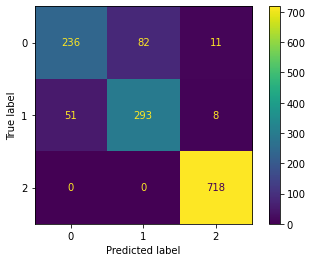

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = predictions
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [15]:
import joblib
filename = 'Random_Forests.sav'
joblib.dump(rf, filename)

['Random_Forests.sav']